In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

#### image randomica com normal, desvio padrão
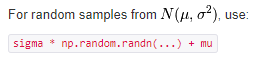
cuidado, desvio padrão é sigma ao quadrado

In [3]:
np.random.seed(42)
m = 100
X = 6 *np.random.rand(m,1)-3 # array com distribuição uniform [0,1] -- indo de -3 a 3 -- 0*6-3,6*1-3
y = .5 * X**2 + X + 2 + np.random.randn(m,1) # somado um ruido normal com media =0 e desvio padrao =1

Saving figure quadratic_data_plot


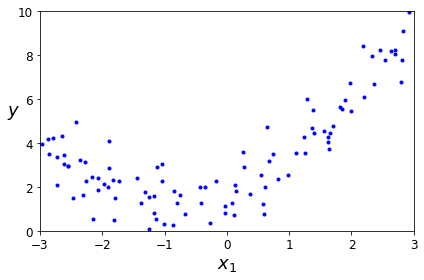

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [5]:
print(X.shape)
# PolynomialFeatures cria um polinomio com todas as combinações
# se polinomio na forma a,b criaria [1, a, b, a^2, ab, b^2] se o bias fosse = True
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures (degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X_poly.shape)

(100, 1)
(100, 2)


In [6]:
print('x[0] original:', X[0])
print ('x[0] **2:',X[0]**2)

x[0] original: [-0.75275929]
x[0] **2: [ 0.56664654]


In [7]:
# criou um polinomio com o x original e mais x^2
X_poly[0]

array([-0.75275929,  0.56664654])

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([ 1.78134581]), array([[ 0.93366893,  0.56456263]]))

Saving figure quadratic_predictions_plot


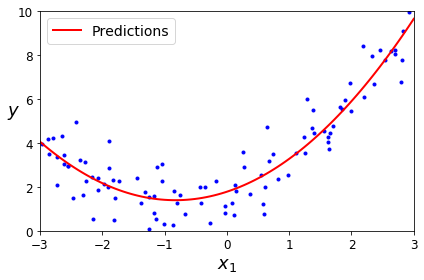

In [9]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

In [10]:
print(X_new[1,0])
print(X_new_poly[1,1])

-2.93939393939
8.64003673095


#### Looking at the learning curves

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [12]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


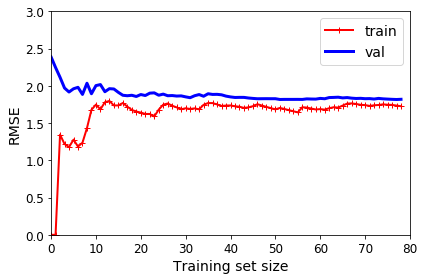

In [13]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

Saving figure learning_curves_plot


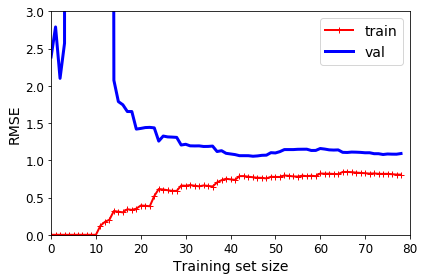

In [14]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

In [15]:
from sklearn.linear_model import Ridge

In [16]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [17]:
ridge_reg = Ridge(alpha=1,solver ="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[ 4.82497007]])

In [26]:
t_flatten = np.array([[1,2,3],[4,5,6]])
print (t_flatten.shape)
t_flatten = t_flatten.ravel()
print (t_flatten)

(2, 3)
[1 2 3 4 5 6]


In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor (penalty = "l2")
sgd_reg.fit (X,y.ravel()) # ravel é uma função flatten da variavel
sgd_reg.predict ([[1.5]])

C:\Users\Tales\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 3.80186964])